This notebook uses the results from the perturbation test (`perturbation_test.py`, `perturbation_test_ours.py`). And plots the P-AUC.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/ytjun/.conda/envs/fact/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


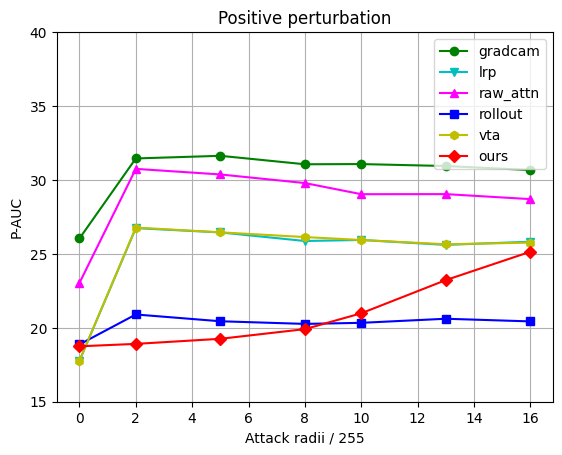

In [2]:
gradcam = torch.load(f'perturbation_results/7R9M_IMGNET4000/pos/gradcam.pt', map_location=torch.device('cpu'))
lrp = torch.load(f'perturbation_results/7R9M_IMGNET4000/pos/lrp.pt', map_location=torch.device('cpu'))
raw_attn = torch.load(f'perturbation_results/7R9M_IMGNET4000/pos/raw_attn.pt', map_location=torch.device('cpu'))
rollout = torch.load(f'perturbation_results/7R9M_IMGNET4000/pos/rollout.pt', map_location=torch.device('cpu'))
vta = torch.load(f'perturbation_results/7R9M_IMGNET4000/pos/vta.pt', map_location=torch.device('cpu'))
ours = torch.load(f'perturbation_results/7R9M_IMGNET4000/pos/ours.pt', map_location=torch.device('cpu'))

xv = np.linspace(0.1, 0.9, 9)
gradcam = [np.trapz(gradcam[i,:].numpy() * 100, xv) for i in range(7)]
lrp = [np.trapz(lrp[i,:].numpy() * 100, xv) for i in range(7)]
raw_attn = [np.trapz(raw_attn[i,:].numpy() * 100, xv) for i in range(7)]
rollout = [np.trapz(rollout[i,:].numpy() * 100, xv) for i in range(7)]
vta = [np.trapz(vta[i,:].numpy() * 100, xv) for i in range(7)]
ours = [np.trapz(ours[i,:].numpy() * 100, xv) for i in range(7)]

xv2 = np.floor(np.linspace(0,16,7))
plt.plot(xv2, gradcam, '-o', label="gradcam", c='g')
plt.plot(xv2, lrp, '-v', label="lrp", c='c')
plt.plot(xv2, raw_attn, '-^', label="raw_attn", c='magenta')
plt.plot(xv2, rollout, '-s', label="rollout", c='b')
plt.plot(xv2, vta, '-h', label="vta", c='y')
plt.plot(xv2, ours, '-D',label="ours", c='r')
plt.ylim(15,40)
plt.xlabel('Attack radii / 255')
plt.ylabel('P-AUC')
plt.title('Positive perturbation')
plt.grid()
plt.legend()
plt.savefig('pertu_plots/positive.pdf')

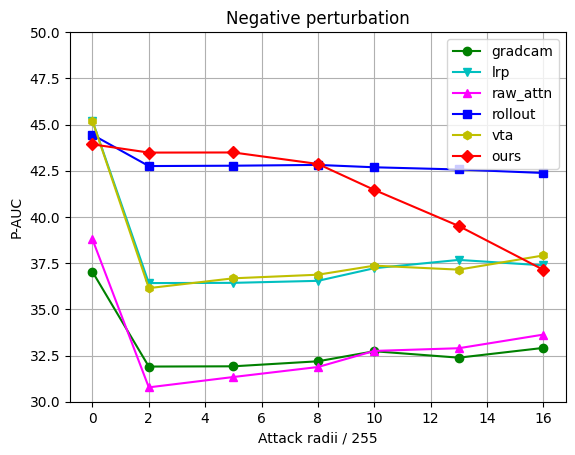

In [3]:
gradcam2 = torch.load(f'perturbation_results/7R9M_IMGNET4000/neg/gradcam.pt', map_location=torch.device('cpu'))
lrp2 = torch.load(f'perturbation_results/7R9M_IMGNET4000/neg/lrp.pt', map_location=torch.device('cpu'))
raw_attn2 = torch.load(f'perturbation_results/7R9M_IMGNET4000/neg/raw_attn.pt', map_location=torch.device('cpu'))
rollout2 = torch.load(f'perturbation_results/7R9M_IMGNET4000/neg/rollout.pt', map_location=torch.device('cpu'))
vta2 = torch.load(f'perturbation_results/7R9M_IMGNET4000/neg/vta.pt', map_location=torch.device('cpu'))
ours2 = torch.load(f'perturbation_results/7R9M_IMGNET4000/neg/ours.pt', map_location=torch.device('cpu'))

xv = np.linspace(0.1, 0.9, 9)
gradcam2 = [np.trapz(gradcam2[i,:].numpy() * 100, xv) for i in range(7)]
lrp2 = [np.trapz(lrp2[i,:].numpy() * 100, xv) for i in range(7)]
raw_attn2 = [np.trapz(raw_attn2[i,:].numpy() * 100, xv) for i in range(7)]
rollout2 = [np.trapz(rollout2[i,:].numpy() * 100, xv) for i in range(7)]
vta2 = [np.trapz(vta2[i,:].numpy() * 100, xv) for i in range(7)]
ours2 = [np.trapz(ours2[i,:].numpy() * 100, xv) for i in range(7)]

xv2 = np.floor(np.linspace(0,16,7))
plt.plot(xv2, gradcam2, '-o', label="gradcam", c='g')
plt.plot(xv2, lrp2, '-v', label="lrp", c='c')
plt.plot(xv2, raw_attn2, '-^', label="raw_attn", c='magenta')
plt.plot(xv2, rollout2, '-s', label="rollout", c='b')
plt.plot(xv2, vta2, '-h', label="vta", c='y')
plt.plot(xv2, ours2, '-D',label="ours", c='r')
plt.ylim(30,50)
plt.xlabel('Attack radii / 255')
plt.ylabel('P-AUC')
plt.title('Negative perturbation')
plt.grid()
plt.legend()
plt.savefig('pertu_plots/negative.pdf')